<a href="https://colab.research.google.com/github/Devanshu070/MNIST-using-ANN-CNN/blob/main/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Input, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist, cifar10

In [20]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()# Plot the first 5 images from the training set

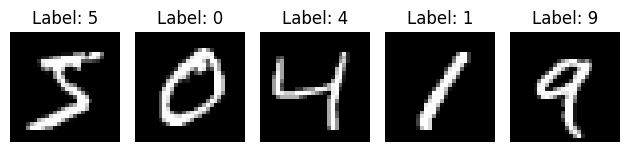

In [21]:
# Plot the first 5 images from the training set
for i in range(5):
    plt.subplot(1, 5, i + 1)  # Create a subplot with 1 row and 5 columns  rows,columns,index
    plt.imshow(x_train[i], cmap='gray')  # Display the image in grayscale
    plt.title(f"Label: {y_train[i]}")  # Set the title as the label
    plt.axis('off')  # Turn off axis  hides the axis making image more clearer

plt.tight_layout()  # Adjust spacing between plots

plt.show()  # Display the plots


In [22]:
print("x_train.shape", x_train.shape)
print("y_train.shape", y_train.shape)

x_train.shape (60000, 28, 28)
y_train.shape (60000,)


In [23]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [24]:
y_train[0]

5

In [25]:
x_train[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [26]:
x_train = x_train/255
x_test = x_test/255

In [27]:
model = Sequential()
model.add(Input(shape=(28, 28,1)))
# CNN
model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
# normal ANN
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 34)            │          19,618 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 34)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 136)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          17,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 39,084 (152.67 KB)

 Trainable params: 39,084 (152.67 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 0.8594 - loss: 0.4522
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9791 - loss: 0.0681
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.9837 - loss: 0.0501
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9883 - loss: 0.0361
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 22ms/step - accuracy: 0.9892 - loss: 0.0303


In [30]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9862 - loss: 0.0423
Test Loss: 0.033196933567523956
Test Accuracy: 98.90%


In [31]:
# Select the 12th sample from x_test
input_sample = x_test[289].reshape(1, 28, 28, 1)  # Add batch dimension

# Make a prediction
predicted_probs = model.predict(input_sample)  # Get predicted probabilities
predicted_class = np.argmax(predicted_probs)   # Get the class with the highest probability


# Print the results
print(f"Predicted class: {predicted_class}")
print(f"True label: {y_test[289]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted class: 5
True label: 5


In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict the classes for the test set
y_pred_probs = model.predict(x_test)  # Model outputs probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [33]:
# Classification report for precision, recall, and F1 score
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      1.00      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.97      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



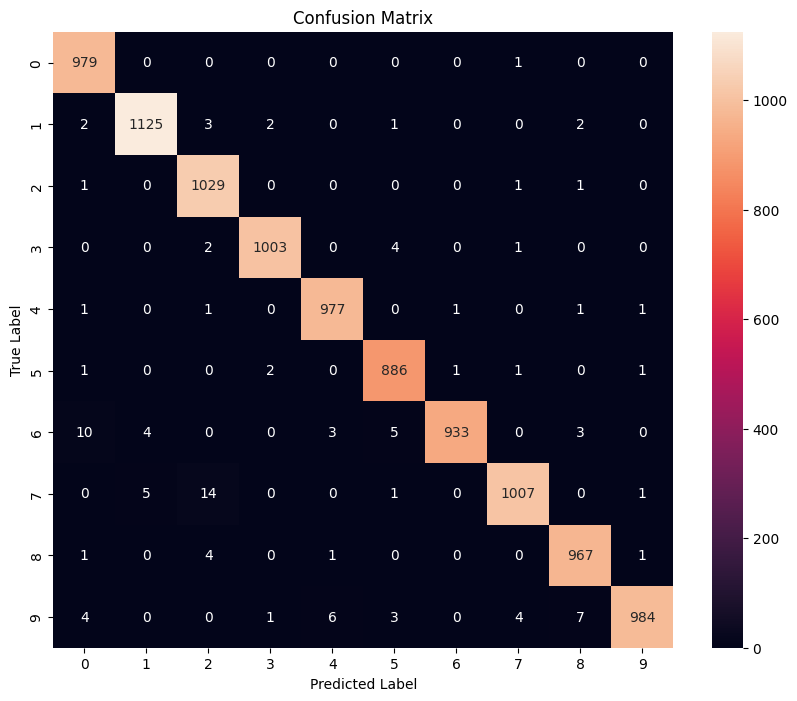

In [34]:
# Compute confusion matrix and other metrics
cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(cm)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()